# `label_boundaries`
This function Create boundary pore labels based on proximity to axis extrema.

In [1]:
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt

ws = op.Workspace()
ws.settings['loglevel'] = 50
np.random.seed(10)
ps.visualization.set_mpl_style()

## `Create network and label boundaries`

In [2]:
net = op.network.Cubic(shape=[15, 15], connectivity=18, spacing=[1e-6, 1e-6])
net = ps.networks.label_boundaries(net,labels=[['left', 'right'], ['front', 'back'], ['top', 'bottom']], tol=1e-9)
try:
    geo = op.geometry.StickAndBall(network=net, pores=net.Ps, throats=net.Ts)
except AttributeError:
    geo = op.geometry.SpheresAndCylinders(network=net, pores=net.Ps, throats=net.Ts)

------------------------------------------------------------
CRITICAL   : front and back labels have been switched to obey the right-hand rule 
SOURCE     : openpnm.network.Cubic.__init__ 
TIME STAMP : 2022-06-22 19:34:45,652
------------------------------------------------------------


## `Plot boundary pores`
left boundary pores plotted in green and right boundary pores are in red

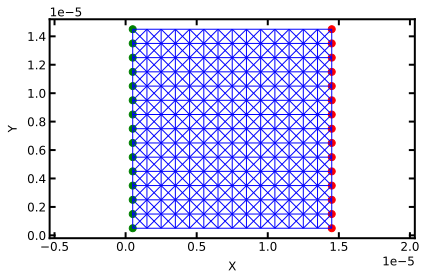

In [3]:
fig, ax = plt.subplots()
op.topotools.plot_connections(network=net, ax=ax)
op.topotools.plot_coordinates(network=net,
                              ax=ax,
                              pores=net['pore.right'],
                              markersize=50, c='r');
op.topotools.plot_coordinates(network=net,
                              ax=ax,
                              pores=net['pore.left'],
                              markersize=50, c='g');